# Metricas

In [4]:
import os

ruta_actual = os.getcwd()  # Obtiene la ruta actual
ruta_anterior = os.path.dirname(ruta_actual)  # Obtiene la carpeta anterior

print("Ruta actual:", ruta_actual)
print("Ruta anterior:", ruta_anterior)


Ruta actual: c:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\Brain\BrainAge_MachineLearning_MultipleModels
Ruta anterior: c:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\Brain


In [8]:
import pandas as pd

# Definir la lista de modelos
modelos = [
    "BaggedKNN", "CatBoost", "ElasticNet", "KernelRidge", "KNN", "Lasso",
    "MLP", "RandomForest", "SVRlineal", "XGBoost", "SVRkernel", "Ridge","Dummy"
]

# Ruta base del archivo
file_path = "results/metrics_results_per_fold.xlsx"

# Leer los archivos y almacenarlos en un diccionario
metrics_dfs = {modelo: pd.read_excel(f"{modelo}/{file_path}", engine="openpyxl") for modelo in modelos}

# Acceder a los dataframes por nombre de modelo
print(metrics_dfs["BaggedKNN"])  # Ejemplo de uso


     Fold        MAE  MAE_corrected        R2  R2_corrected
0       1  13.636123       7.279807  0.353654      0.811294
1       2  13.868646       7.312467  0.329081      0.807380
2       3  16.133759       8.868625  0.151943      0.748926
3       4  15.084196       7.886971  0.220622      0.756837
4       5  14.929185       8.471851  0.164029      0.728003
..    ...        ...            ...       ...           ...
195   196  15.025413       7.695600  0.218622      0.782346
196   197  12.097361       6.865656  0.408416      0.809549
197   198  14.745753       7.478277  0.283100      0.804848
198   199  12.736217       7.295276  0.362230      0.799607
199   200  14.017284       6.698541  0.325907      0.828897

[200 rows x 5 columns]


C:\Users\felip\AppData\Local\Temp\ipykernel_31444\1313372519.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(ordered_data.values())),


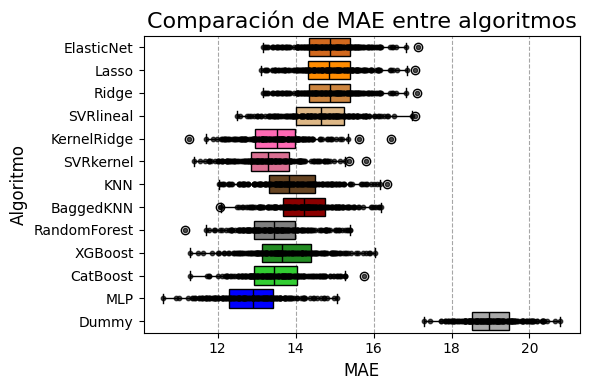

C:\Users\felip\AppData\Local\Temp\ipykernel_31444\1313372519.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(ordered_data.values())),


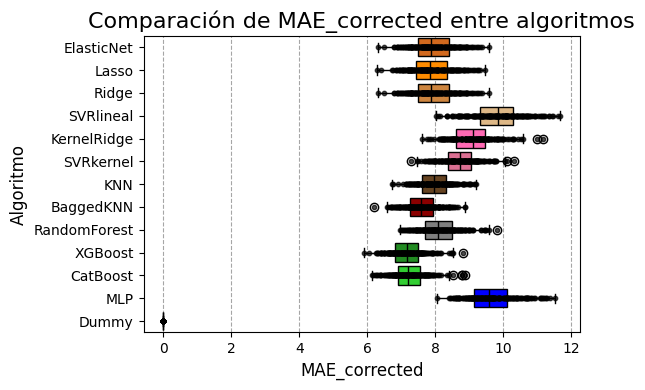

C:\Users\felip\AppData\Local\Temp\ipykernel_31444\1313372519.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(ordered_data.values())),


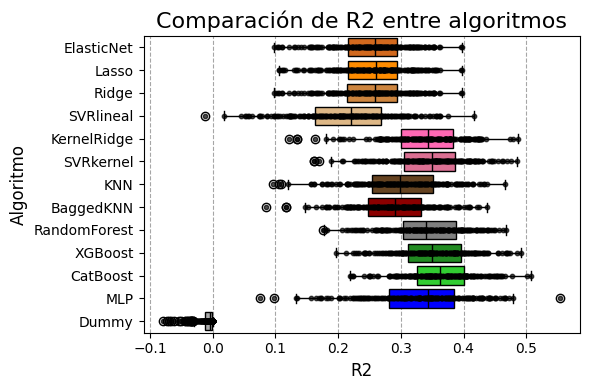

C:\Users\felip\AppData\Local\Temp\ipykernel_31444\1313372519.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(ordered_data.values())),


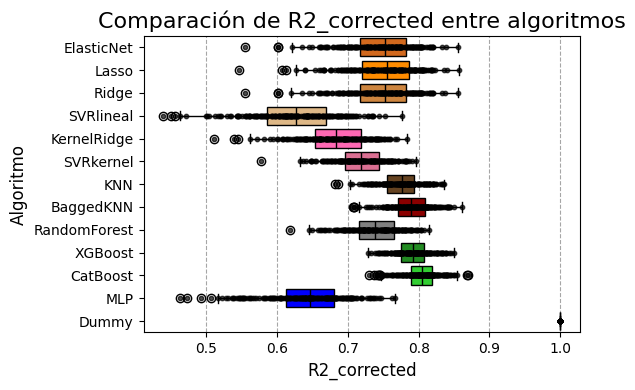

In [9]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lista de modelos, incluyendo Dummy
modelos = [
    "ElasticNet", "Lasso", "Ridge", "SVRlineal",  # Modelos lineales
    "KernelRidge", "SVRkernel",  # Modelos Kernel
    "KNN", "BaggedKNN",  # Modelos KNN
    "RandomForest", "XGBoost", "CatBoost",  # Modelos basados en árboles
    "MLP",  # Redes neuronales   
    "Dummy"  # Modelo de referencia
]

# Ruta base del archivo
file_path = "results/metrics_results_per_fold.xlsx"

# Leer los archivos en un diccionario
metrics_dict = {modelo: pd.read_excel(f"{modelo}/{file_path}", engine="openpyxl") for modelo in modelos}

# Extraer las métricas en listas separadas por algoritmo
metrics_to_plot = {
    "MAE": {name: df["MAE"] for name, df in metrics_dict.items()},
    "MAE_corrected": {name: df["MAE_corrected"] for name, df in metrics_dict.items()},
    "R2": {name: df["R2"] for name, df in metrics_dict.items()},
    "R2_corrected": {name: df["R2_corrected"] for name, df in metrics_dict.items()},
}

# Nueva paleta de colores con tonos diferenciados por familias de modelos
colores_algoritmos = {
    "BaggedKNN": "#8B0000",  # Rojo oscuro (DarkRed)
    "KNN": "#654321",        # Marrón oscuro (DarkBrown)

    "Random_Forest": "#006400", # Verde oscuro
    "XGBoost": "#228B22",       # Verde medio
    "CatBoost": "#32CD32",      # Verde lima oscuro

    "ElasticNet": "#D2691E",  # Marrón claro (Chocolate)
    "Lasso": "#FF8C00",       # Naranja oscuro
    "Ridge": "#CD853F",       # Marrón tostado
    "SVRlineal": "#DEB887",   # Beige (BurlyWood)

    "KernelRidge": "#FF69B4", # Rosado fuerte (HotPink)
    "SVRkernel": "#DB7093",   # Rosado oscuro (PaleVioletRed)

    "MLP": "#0000FF",         # Azul eléctrico

    "Dummy": "#A9A9A9"        # Gris oscuro (DarkGray)
}


# Configurar el fondo blanco globalmente
plt.rcParams['axes.facecolor'] = 'white'

def plot_metrics(metrics_to_plot, colores_algoritmos):
    """Genera boxplots para cada métrica en metrics_to_plot con los colores definidos en colores_algoritmos."""
    for metric, data in metrics_to_plot.items():
        ordered_data = {model: data[model] for model in modelos}  # Asegurar el orden definido

        plt.figure(figsize=(6, 4))
        plt.gcf().set_facecolor('white')  # Fondo blanco manual
        
        # Crear el boxplot
        # Crear el boxplot con el ancho ajustado
        box = plt.boxplot(list(reversed(ordered_data.values())), 
                  labels=list(reversed(ordered_data.keys())), 
                  vert=False, 
                  patch_artist=True, 
                  showmeans=True, 
                  widths=0.8)  # Ajusta el valor de "widths" para cambiar el tamaño de las cajas

        
        # Personalizar cada caja con el color del diccionario
        for i, patch in enumerate(box['boxes']):
            algorithm_name = list(reversed(ordered_data.keys()))[i]
            patch.set_facecolor(colores_algoritmos.get(algorithm_name, "#7f7f7f"))  # Color predeterminado
        
        # Personalizar la media y mediana en el boxplot
        for median in box['medians']:
            median.set(color='black', linewidth=1)  # Mediana en rojo

        for mean in box['means']:
            #mean.set(marker='o', color='blue', markersize=8, linestyle='--')  # Media en azul
            mean.set(marker='', color='black', markersize=0.1, linestyle='--', linewidth=5)  # Línea azul para la media


        # Agregar puntos individuales
        for i, (name, values) in enumerate(ordered_data.items()):
            plt.scatter(values, [len(ordered_data) - i] * len(values), color='black', alpha=0.7, s=10, zorder=3)
        
        # Título y etiquetas
        plt.title(f"Comparación de {metric} entre algoritmos", fontsize=16)
        plt.xlabel(metric, fontsize=12)
        plt.ylabel("Algoritmo", fontsize=12)
        
        # Agregar la grilla (en el eje X)
        plt.grid(axis="x", linestyle="--", alpha=0.7, color='gray')
        
        plt.tight_layout()
        plt.show()

# Generar los gráficos
plot_metrics(metrics_to_plot, colores_algoritmos)

# Correlacion entre las predicciones


Matriz de correlación para y_pred:

                   KNN  BaggedKNN  RandomForest   XGBoost  CatBoost       MLP  \
KNN           1.000000   0.955496      0.891085  0.895203  0.905953  0.810610   
BaggedKNN     0.955496   1.000000      0.888716  0.888977  0.901572  0.815322   
RandomForest  0.891085   0.888716      1.000000  0.994197  0.982958  0.850547   
XGBoost       0.895203   0.888977      0.994197  1.000000  0.982098  0.861829   
CatBoost      0.905953   0.901572      0.982958  0.982098  1.000000  0.850003   
MLP           0.810610   0.815322      0.850547  0.861829  0.850003  1.000000   
ElasticNet    0.748563   0.772970      0.783971  0.782028  0.795697  0.791545   
Lasso         0.750829   0.775666      0.785141  0.783030  0.797029  0.791903   
Ridge         0.748359   0.772733      0.783744  0.781827  0.795463  0.791388   
SVRlineal     0.758295   0.788344      0.791471  0.787104  0.804637  0.786714   
KernelRidge   0.850568   0.872538      0.871799  0.880131  0.875761  0.8

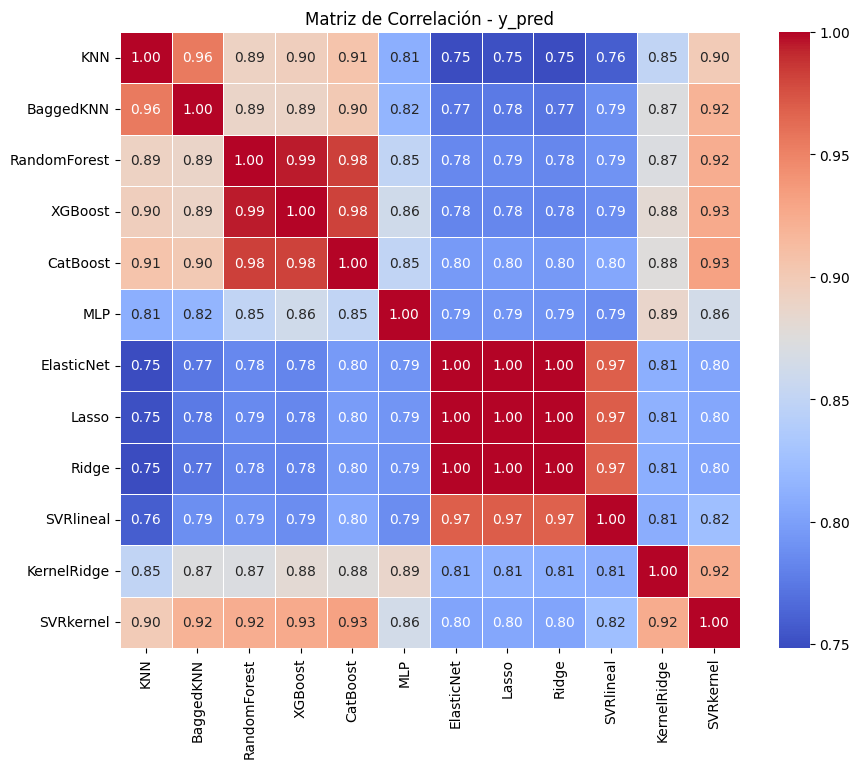


Matriz de correlación para y_pred_corrected:

                   KNN  BaggedKNN  RandomForest   XGBoost  CatBoost       MLP  \
KNN           1.000000   0.987634      0.962608  0.969193  0.973207  0.926147   
BaggedKNN     0.987634   1.000000      0.962488  0.967919  0.972471  0.928886   
RandomForest  0.962608   0.962488      1.000000  0.996603  0.991838  0.936199   
XGBoost       0.969193   0.967919      0.996603  1.000000  0.994298  0.941560   
CatBoost      0.973207   0.972471      0.991838  0.994298  1.000000  0.937185   
MLP           0.926147   0.928886      0.936199  0.941560  0.937185  1.000000   
ElasticNet    0.929521   0.936635      0.929886  0.936675  0.942317  0.923039   
Lasso         0.930471   0.937672      0.930415  0.937211  0.942964  0.923206   
Ridge         0.929434   0.936542      0.929797  0.936591  0.942224  0.922978   
SVRlineal     0.916788   0.926923      0.922381  0.924563  0.931104  0.914324   
KernelRidge   0.943598   0.951938      0.947568  0.951731  0.9

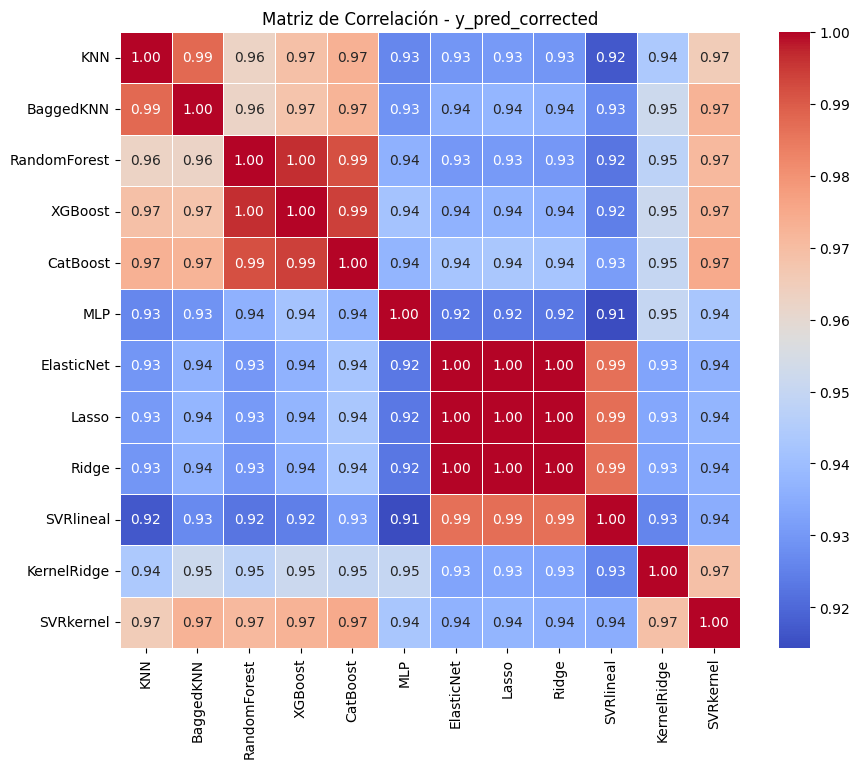


Matriz de correlación para GAP:

                   KNN  BaggedKNN  RandomForest   XGBoost  CatBoost       MLP  \
KNN           1.000000   0.980200      0.949326  0.953136  0.957391  0.869420   
BaggedKNN     0.980200   1.000000      0.951839  0.957344  0.959683  0.872276   
RandomForest  0.949326   0.951839      1.000000  0.993888  0.991764  0.889076   
XGBoost       0.953136   0.957344      0.993888  1.000000  0.990957  0.886033   
CatBoost      0.957391   0.959683      0.991764  0.990957  1.000000  0.885849   
MLP           0.869420   0.872276      0.889076  0.886033  0.885849  1.000000   
ElasticNet    0.885591   0.902105      0.901307  0.906997  0.909157  0.865515   
Lasso         0.887046   0.903727      0.902225  0.907976  0.910171  0.865623   
Ridge         0.885449   0.901951      0.901158  0.906851  0.909003  0.865426   
SVRlineal     0.856876   0.873386      0.873315  0.867533  0.879707  0.853269   
KernelRidge   0.904752   0.916008      0.913648  0.910245  0.913709  0.9147

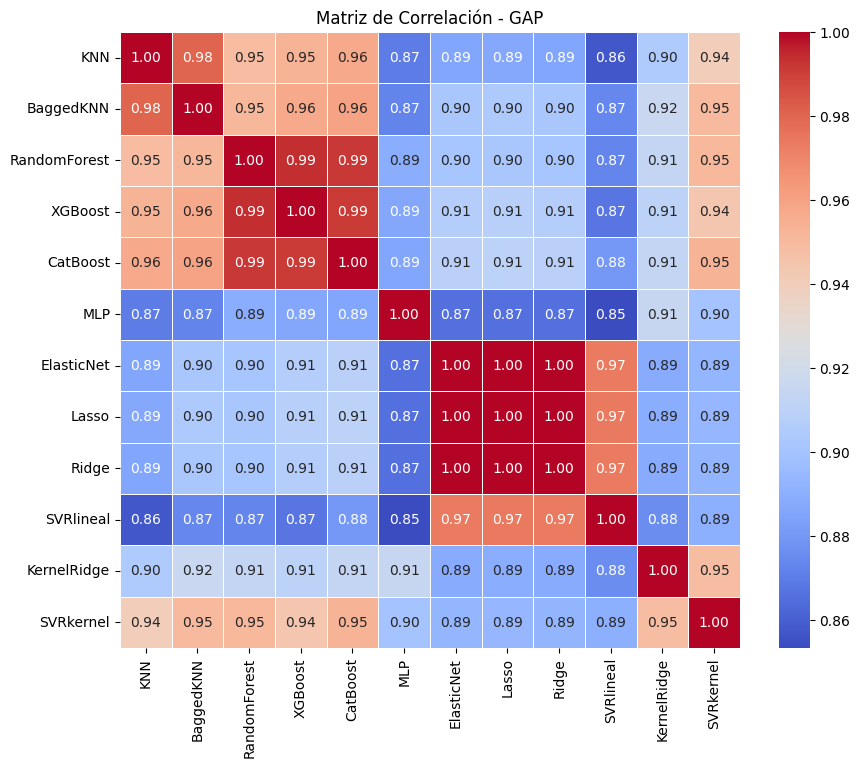


Matriz de correlación para GAP_corrected:

                   KNN  BaggedKNN  RandomForest   XGBoost  CatBoost       MLP  \
KNN           1.000000   0.929710      0.790253  0.764899  0.847731  0.714983   
BaggedKNN     0.929710   1.000000      0.829338  0.810530  0.862720  0.736599   
RandomForest  0.790253   0.829338      1.000000  0.988509  0.961598  0.759003   
XGBoost       0.764899   0.810530      0.988509  1.000000  0.939949  0.752541   
CatBoost      0.847731   0.862720      0.961598  0.939949  1.000000  0.770483   
MLP           0.714983   0.736599      0.759003  0.752541  0.770483  1.000000   
ElasticNet    0.647419   0.676892      0.642987  0.611975  0.693661  0.698331   
Lasso         0.650225   0.680009      0.643497  0.612008  0.694812  0.698257   
Ridge         0.647150   0.676590      0.642724  0.611761  0.693358  0.698130   
SVRlineal     0.661260   0.695859      0.647707  0.611808  0.703929  0.690315   
KernelRidge   0.775747   0.820358      0.792840  0.782330  0.8125

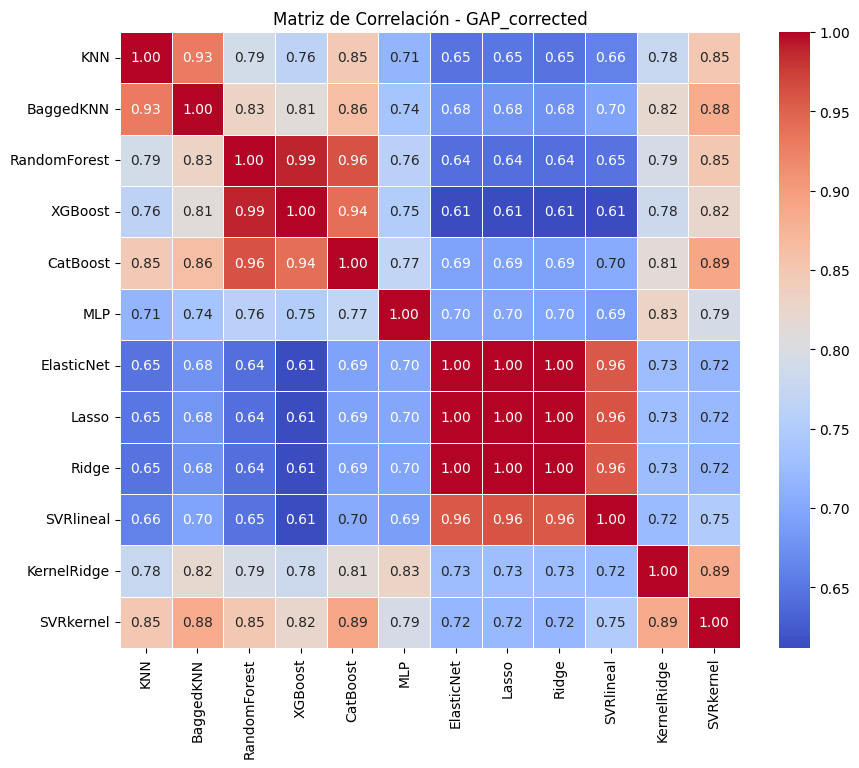

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de modelos, incluyendo Dummy
modelos = [
    "KNN", "BaggedKNN",  # Modelos KNN
    "RandomForest", "XGBoost", "CatBoost",  # Modelos basados en árboles
    "MLP",  # Redes neuronales
    "ElasticNet", "Lasso", "Ridge", "SVRlineal",  # Modelos lineales
    "KernelRidge", "SVRkernel",  # Modelos Kernel
    #"Dummy"  # Modelo de referencia
]

# Directorio base para los modelos
base_dir = "results/"

# Leer todos los DataFrames de los modelos
modelos_dataframes = {}

for modelo in modelos:
    # Construir la ruta de cada archivo para cada modelo
    file_path = f"{modelo}/{base_dir}/df_CN_results_training.xlsx"
    # Leer el archivo Excel para cada modelo
    modelos_dataframes[modelo] = pd.read_excel(file_path, engine='openpyxl')

# Asegurar que todos los DataFrames estén ordenados por 'ID_unique'
for modelo in modelos_dataframes:
    modelos_dataframes[modelo] = modelos_dataframes[modelo].sort_values(by="ID_unique").reset_index(drop=True)

# Variables de interés
columnas_interes = ["y_pred", "y_pred_corrected", "GAP", "GAP_corrected"]

# Crear un diccionario para almacenar los datos de correlación
data_corr = {}

# Extraer cada variable de cada modelo
for col in columnas_interes:
    # Crear un DataFrame para la variable específica con las columnas de cada modelo
    data_corr[col] = pd.DataFrame({modelo: modelos_dataframes[modelo][col] for modelo in modelos_dataframes})

    # Calcular la correlación entre los modelos para esta variable
    corr_matrix = data_corr[col].corr()

    # Mostrar la matriz de correlación
    print(f"\nMatriz de correlación para {col}:\n")
    print(corr_matrix)

    # Graficar la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Matriz de Correlación - {col}")
    plt.show()
